# ICPE 641 Data Science Fundamental for Energy II

Some of the examples and exercises of this course are based on two popular books on data science with Python, [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
and [the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).

<span><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/HandsonML.jpg?raw=1" width="200" /><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/PDSH-cover.png?raw=1" width="200" /></span>

## Deep Learning Methods

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. This module covers the following topiocs.

1. Perceptrons
2. Multi-layer perceptrons
3. Deep Neural Network with Keras

[<img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/colab-badge.png?raw=1" width="200"/>](https://colab.research.google.com/github/Snehashis111/AdvancedML/blob/main/Deep_Learning_methods.ipynb)

In [21]:
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# hide warning messages
import warnings
warnings.filterwarnings('ignore')

### Perceptrons
The Perceptron is a simple classification algorithm suitable for large scale learning. As the simplest form of a neural network, specifically a single-layer neural network, perceptrons play an important role in binary classification. Perceptrons are also referred to as linear binary classifiers for this reason.

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/Perceptron.png?raw=1" width="400"/><br/>Credit: DeepAI.org</center> <br>
Step function,$H(x)$ is defined below $$H(t) = \begin{cases}
1 & \text{if } t \geq 0 \\
-1 & \text{if } t < 0
\end{cases}
$$<br>
The algorithm conceptually minimizes a loss called Perceptron loss $$L(y, \hat{y}) = \max(0, -y \cdot \hat{y})
$$

there is not an explicit global objective being minimized. The algorithm updated weights when an error occurs.
$$
w_{j}=w_{j}+(y_{i}-H(x_{i}))x_{ij}
$$

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # load petal length and petal width only.
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

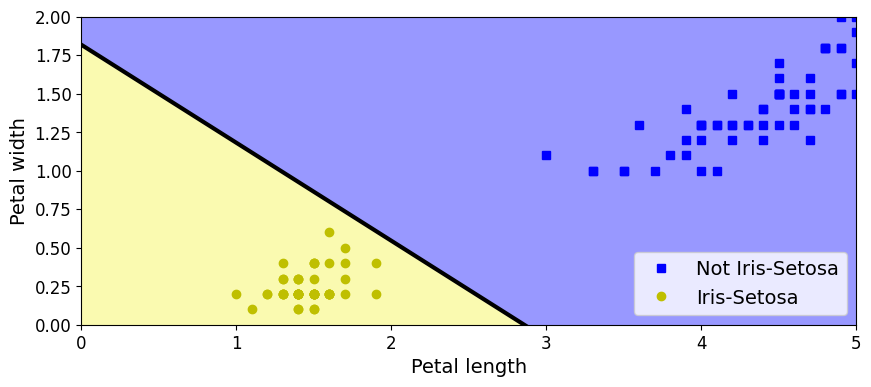

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3) #decision boundary
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes);

### Activation functions
Suppose I want to get probability instead of 0/1 value. Instead of step function we have option to use other functions. These are called activation functions. <br>
The activation function of a node defines the output of that node given an input or set of inputs. In other words, an activation function is like a gate that checks that an incoming value is greater than a critical number. Activation functions add non-linearities into neural networks, making the neural networks more expressive.

<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/activation_function.png?raw=1" width="500"/><br/>Credit: towardsdatascience.com</center>

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

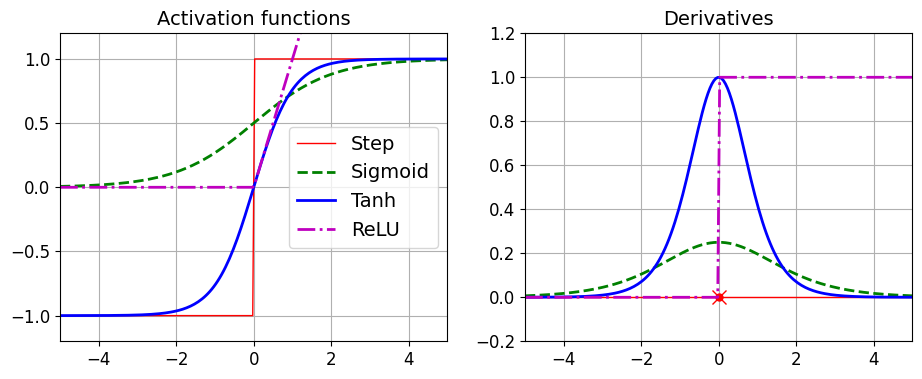

In [9]:
z = np.linspace(-5, 5, 200)
plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()

The linear combination of input and weights and the activation function together builds a neuron. We can stack multiple of them where one neuron sends its output to another neuron resulting in a more complex function. We generally call them neural networks.<br>
For example lets say we want to build a neural network to predict house price from 4 input features Size,Number of bedrooms,Zip code,Wealth of neighbourhood ($x_1,x_2,x_3,x_4$ respectively). Let $a_1,a_2,a_3$ be the output values of 3 neurons in the first layer which has a ReLU activation function.
<center><img src="https://github.com/Snehashis111/AdvancedML/blob/main/images/HousePriceNN.PNG?raw=1" width="500"/><br/></center> <br>
Then giben the image we can write. $$a_1=ReLU(θ_1x_1+θ_2x_2+θ_3)$$
$$a_2=ReLU(θ_4x_3+θ_5)$$
$$a_3=ReLU(θ_6x_3+θ_7x_4+θ_8)$$ <br>
where $\theta$ are parameters. The final output ($\hat{y})$ will be
$$\hat{y}=θ_9a_1+θ_{10}a_2+θ_{11}a_3+θ_{12}$$ <br>
We wont use any activation in that layer as this output can take any value. We estimate these parameters by different optimizer functions available. Some of the optimizer functions available in Keras are SGD,Adam,RMSProp etc. <br>
Inside each layer we use same activation function but different layers can have different activation functions. Some activation function have different inherent problems like for Sigmoid activation for high/low values of $z$ the gradient will be small as the Sigmoid flattens so weights wont get updated by much.



### Building an Image Classifier
Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [3]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

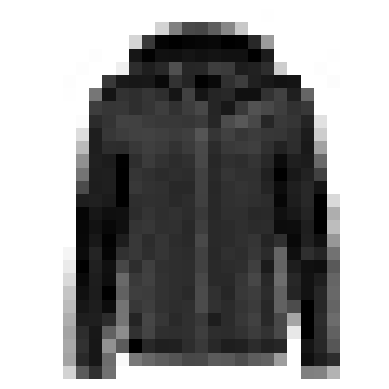

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [8]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [10]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [11]:
X_valid.shape

(5000, 28, 28)

In [12]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

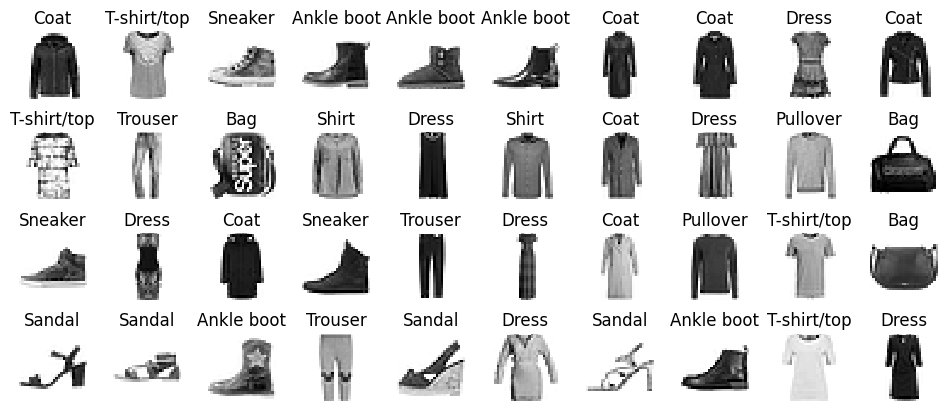

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Softmax activation is used for multi class classification.It converts a vector of K real numbers into a probability distribution of K possible outcomes.$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [ ]:
300*784+300
#300*784 full connections+300 biases


235500

In [ ]:
300*100+100

30100

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

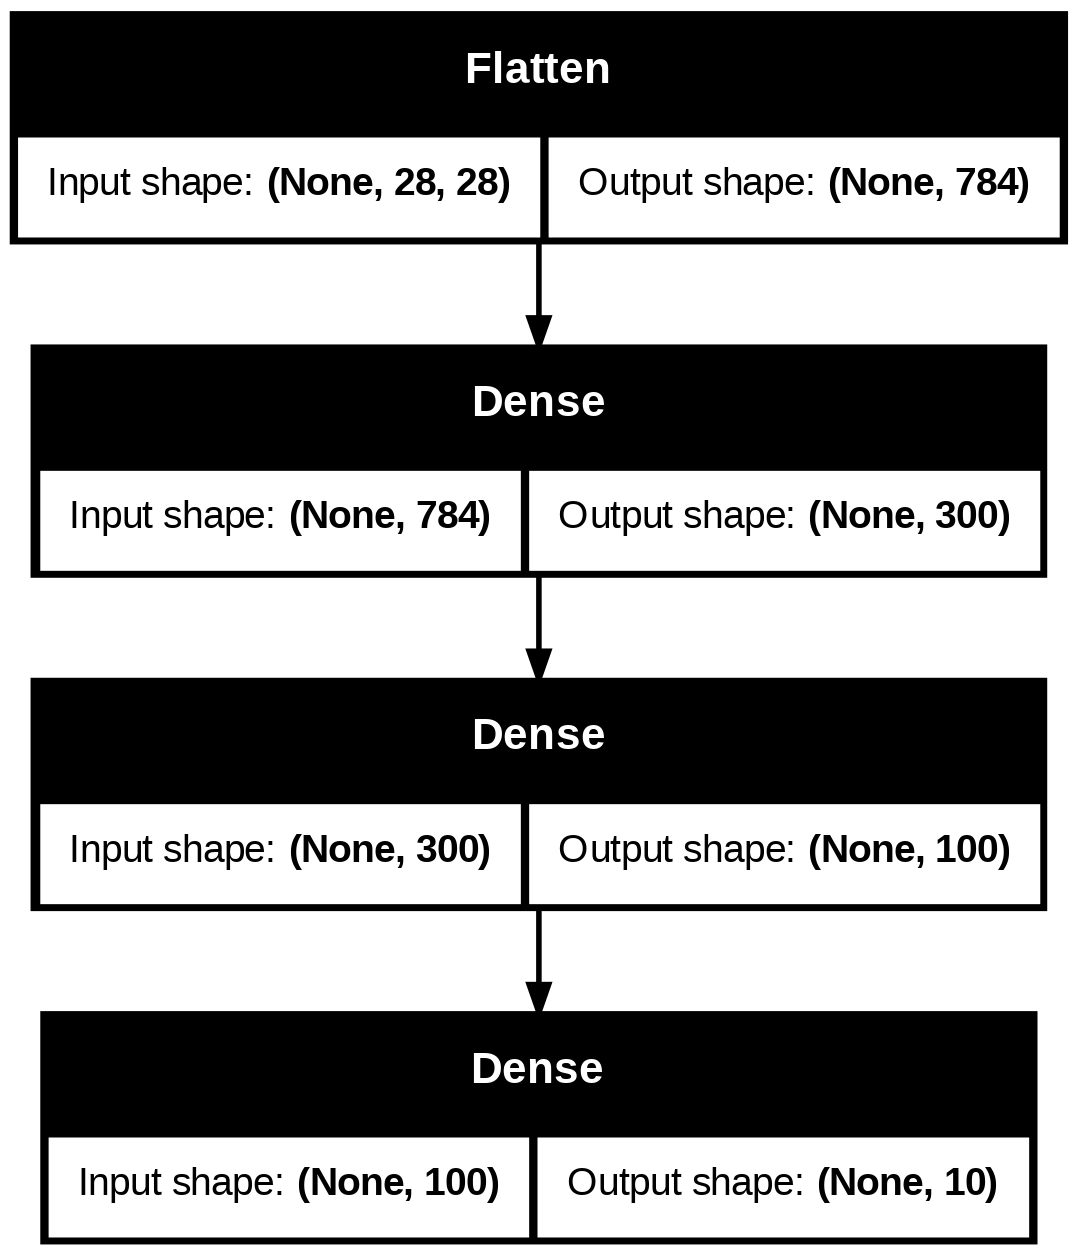

In [7]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [9]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [10]:
weights, biases = hidden1.get_weights()

In [11]:
weights

array([[-0.0046649 , -0.04365543,  0.0078389 , ..., -0.00982585,
        -0.02378767,  0.03725512],
       [ 0.01929104,  0.04431217, -0.07096148, ...,  0.0198502 ,
        -0.02189261,  0.06658711],
       [ 0.03192147,  0.02756629, -0.06448737, ...,  0.00848863,
         0.04253545,  0.06450778],
       ...,
       [ 0.02671865, -0.00830527,  0.05211718, ...,  0.0645863 ,
         0.06869227, -0.00925551],
       [-0.04772628,  0.05614066,  0.01553252, ...,  0.01209881,
        -0.01428692,  0.07264937],
       [-0.02448686, -0.05560078, -0.02717737, ...,  0.0602521 ,
         0.02466989, -0.02843653]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

Keras uses some default initializers.

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Categorical cross entropy is very similar to logistic loss. $$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \cdot \log(\hat{y}_{ij})
$$

In [17]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8503 - loss: 0.4292 - val_accuracy: 0.8558 - val_loss: 0.4216
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8574 - loss: 0.4065 - val_accuracy: 0.8582 - val_loss: 0.4050
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8633 - loss: 0.3884 - val_accuracy: 0.8640 - val_loss: 0.3901
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.3734 - val_accuracy: 0.8662 - val_loss: 0.3778
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3607 - val_accuracy: 0.8678 - val_loss: 0.3679


The primary purpose of validation data is to monitor the model's performance on data that it hasn't seen during training. This helps you evaluate how well the model generalizes to new, unseen examples.

In [18]:
history.params

{'verbose': 'auto', 'epochs': 5, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

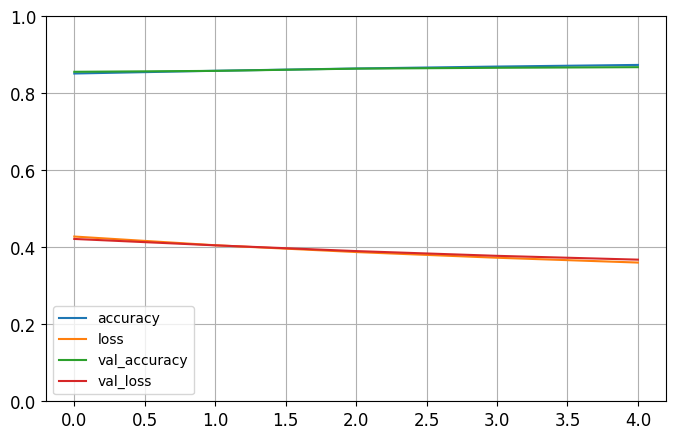

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.4028


[0.410447359085083, 0.8539000153541565]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.13, 0.  , 0.8 ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

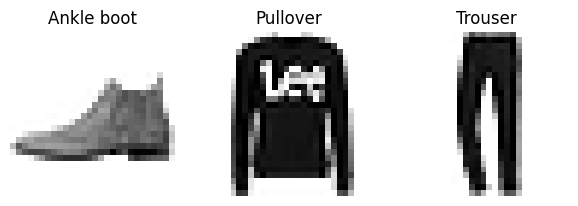

In [30]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5);

###Improving the Neural Network
At first almost always the neural network wont give great result. Few of the following methods can improve performance of your NN.


*   Try with different types of activation functions
*   Normalize your data. If you are normalizing with mean and standard deviation make sure you normalize your test data with mean and standard deviations estimated from train data.
*   Work with different optimization functions.
*   Use different architecture (number of layers, number of neurones,regularization)
*   Early stopping, learning rate scheduling.
  









### Regression MLP

Let's load, split and scale the California housing dataset

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=50)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=50)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit_transform is called on training data only, validation and test data uses same parameters as the training data
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [34]:
print(housing.feature_names[0:9])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
X_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [ ]:
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.177  , 2.631  , 4.815  ])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
X_train.shape[1:]

(8,)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


In [38]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))



Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7119 - val_loss: 0.6548
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6660 - val_loss: 0.6146
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6284 - val_loss: 0.5808
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5960 - val_loss: 0.5521
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5679 - val_loss: 0.5278


In [ ]:
model.layers[0].get_weights()

[array([[ 7.60145411e-02, -2.06116676e-01,  4.85763818e-01,
          3.67868394e-01, -1.52107775e-01,  3.44226003e-01,
          7.89981782e-02,  3.51426899e-01, -4.03834283e-01,
          2.02899382e-01, -4.85739022e-01, -9.23726484e-02,
         -1.40648171e-01,  2.74518669e-01, -2.99232483e-01,
         -2.40334406e-01, -9.96230394e-02,  2.28110656e-01,
         -2.38650054e-01,  4.63885188e-01,  3.81931402e-02,
          3.32736783e-02,  3.73881400e-01,  2.80270338e-01,
          7.62946159e-02,  2.99143910e-01,  4.59588282e-02,
          2.27993447e-02, -1.58835605e-01, -3.05224627e-01],
        [-2.16478229e-01, -5.50358593e-02,  1.61905274e-01,
         -3.40264171e-01, -3.40513319e-01,  2.41127715e-01,
          2.81682819e-01,  9.08705369e-02, -6.63669482e-02,
          1.47412449e-01,  1.31889373e-01,  8.29183683e-02,
          3.02519232e-01, -1.41193613e-01, -6.60134628e-02,
         -8.18693936e-02,  1.81338862e-01,  5.40956184e-02,
          2.38851726e-01,  2.26842403e-

In [39]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


array([[2.2932765],
       [2.6729696],
       [1.79689  ]], dtype=float32)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


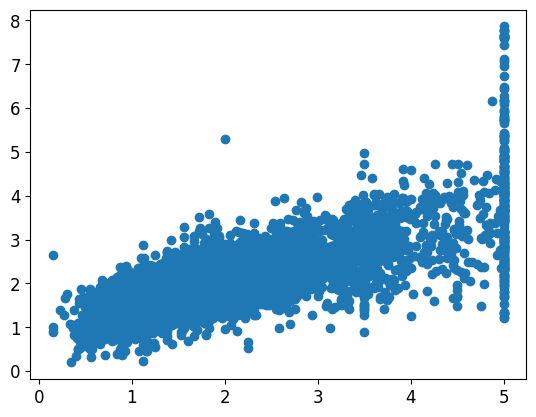

In [40]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)

In [ ]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [41]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5023


0.5218452215194702

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

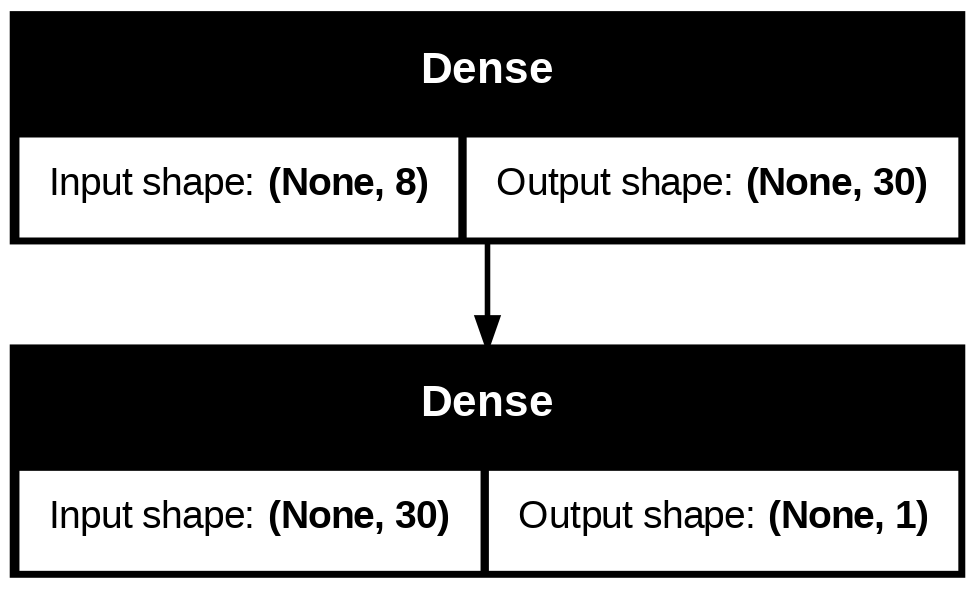

In [43]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.layers[1].get_weights()

[array([[ 0.10803426],
        [-0.09747876],
        [-0.7671485 ],
        [-0.18579806],
        [ 0.06979952],
        [-0.01335062],
        [-0.20273179],
        [ 0.9760487 ],
        [-0.40599132],
        [-0.12478145],
        [-0.4794722 ],
        [ 0.1651796 ],
        [ 0.27919063],
        [-0.33807245],
        [-0.17990378],
        [ 0.0189781 ],
        [-0.0951677 ],
        [-0.02551286],
        [-0.23917922],
        [ 0.8017125 ],
        [ 0.99476975],
        [-0.02594058],
        [ 0.8005735 ],
        [-0.35182658],
        [ 0.01096963],
        [ 0.10874906],
        [ 0.05363045],
        [ 0.40714127],
        [ 0.10824762],
        [-0.14804071]], dtype=float32),
 array([1.1130093], dtype=float32)]

In [ ]:
mse_test

0.3532491624355316

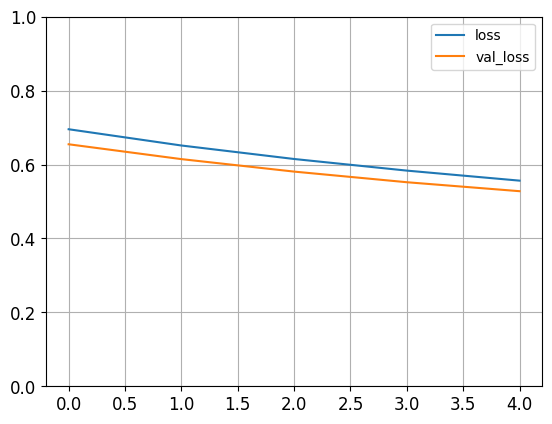

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
y_pred

array([[0.7405552],
       [1.675873 ],
       [4.190014 ]], dtype=float32)

In [ ]:
X_train.shape[1:]

(8,)

In [45]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

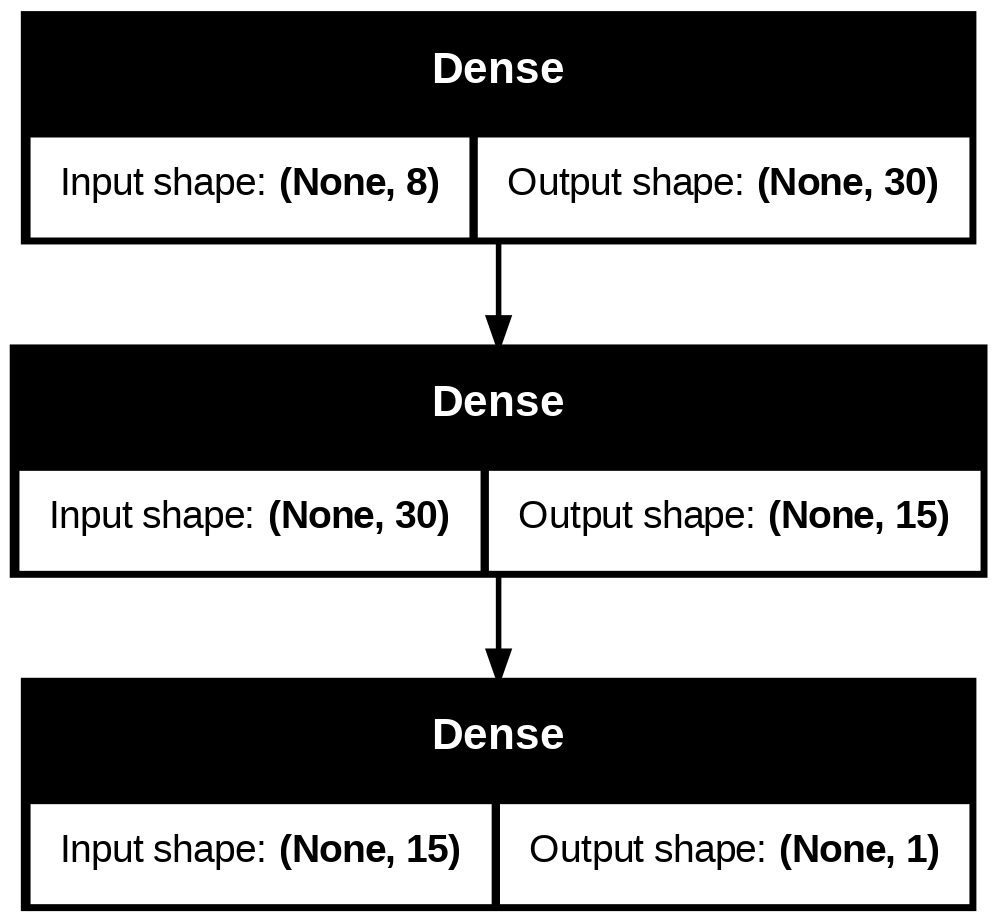

In [46]:
keras.utils.plot_model(model2, show_shapes=True)

In [48]:
model2.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model2.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))


Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.8629 - val_loss: 1.3213
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.7140 - val_loss: 0.8739
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6587 - val_loss: 0.7018
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6183 - val_loss: 0.6199
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5842 - val_loss: 0.5705


In [49]:
mse_test = model2.evaluate(X_test, y_test)
mse_test


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5327


0.5555636286735535

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


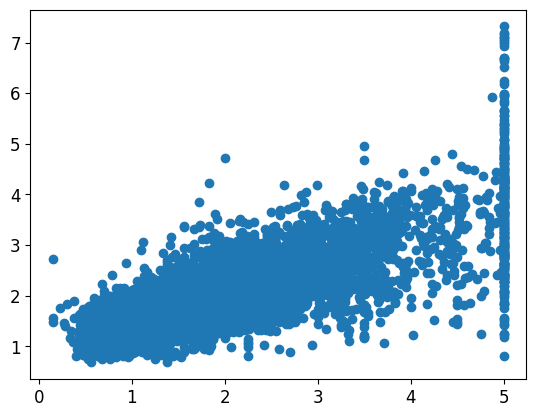

In [50]:
y_pred = model2.predict(X_test)
plt.scatter(y_test,y_pred)

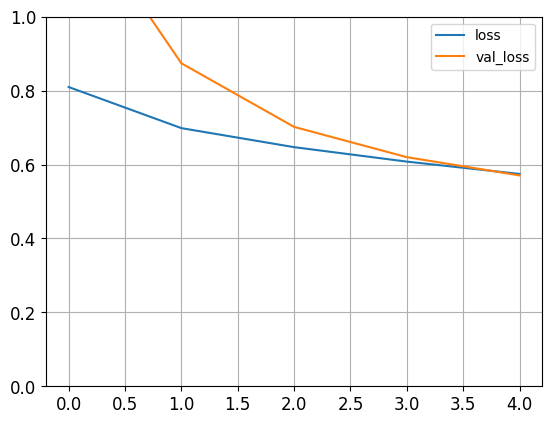

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [53]:
model3 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model3.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history3 = model3.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))


y_pred = model3.predict(X_new)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 3.7402 - val_loss: 0.9209
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8302 - val_loss: 0.7033
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6443 - val_loss: 0.6238
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5987 - val_loss: 0.5864
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5657 - val_loss: 0.5576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


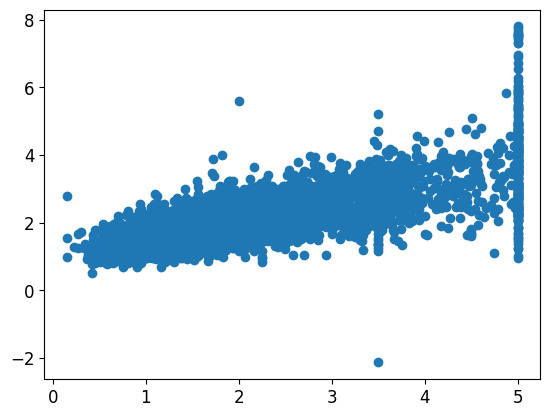

In [54]:
y_pred = model3.predict(X_test)
plt.scatter(y_test,y_pred)

In [55]:
model3.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5155


0.5436060428619385

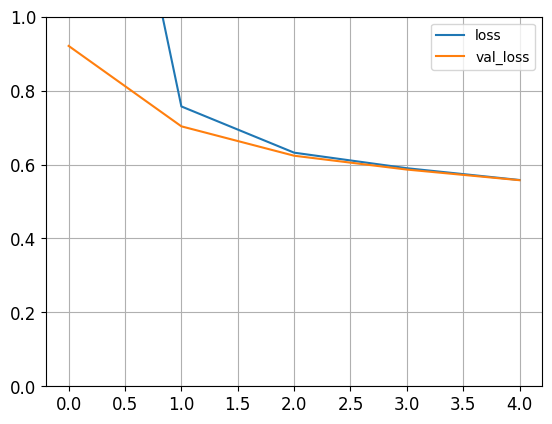

In [56]:
plt.plot(pd.DataFrame(history3.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [58]:
model4 = keras.models.Sequential([
    keras.layers.Dense(15, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1)
])
model4.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history4 = model4.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))


Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.9867 - val_loss: 2.0600
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7956 - val_loss: 1.3373
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6601 - val_loss: 0.8878
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5973 - val_loss: 0.6577
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5575 - val_loss: 0.5533


In [59]:
mse_test = model4.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


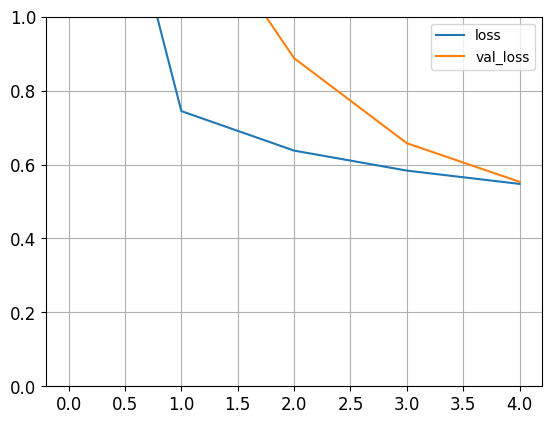

In [60]:
plt.plot(pd.DataFrame(history4.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

If there is small gap between training loss and validation loss but both of them are high that means model is highly biased.<br>  If training loss is much lower than validation loss that is a clear sign of overfitting.

### Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [61]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
X_train.shape

(11610, 8)

In [63]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation="relu")(input_)
hidden2 = keras.layers.Dense(5, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(10, activation="relu")(input_)
concat = keras.layers.concatenate([input_, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

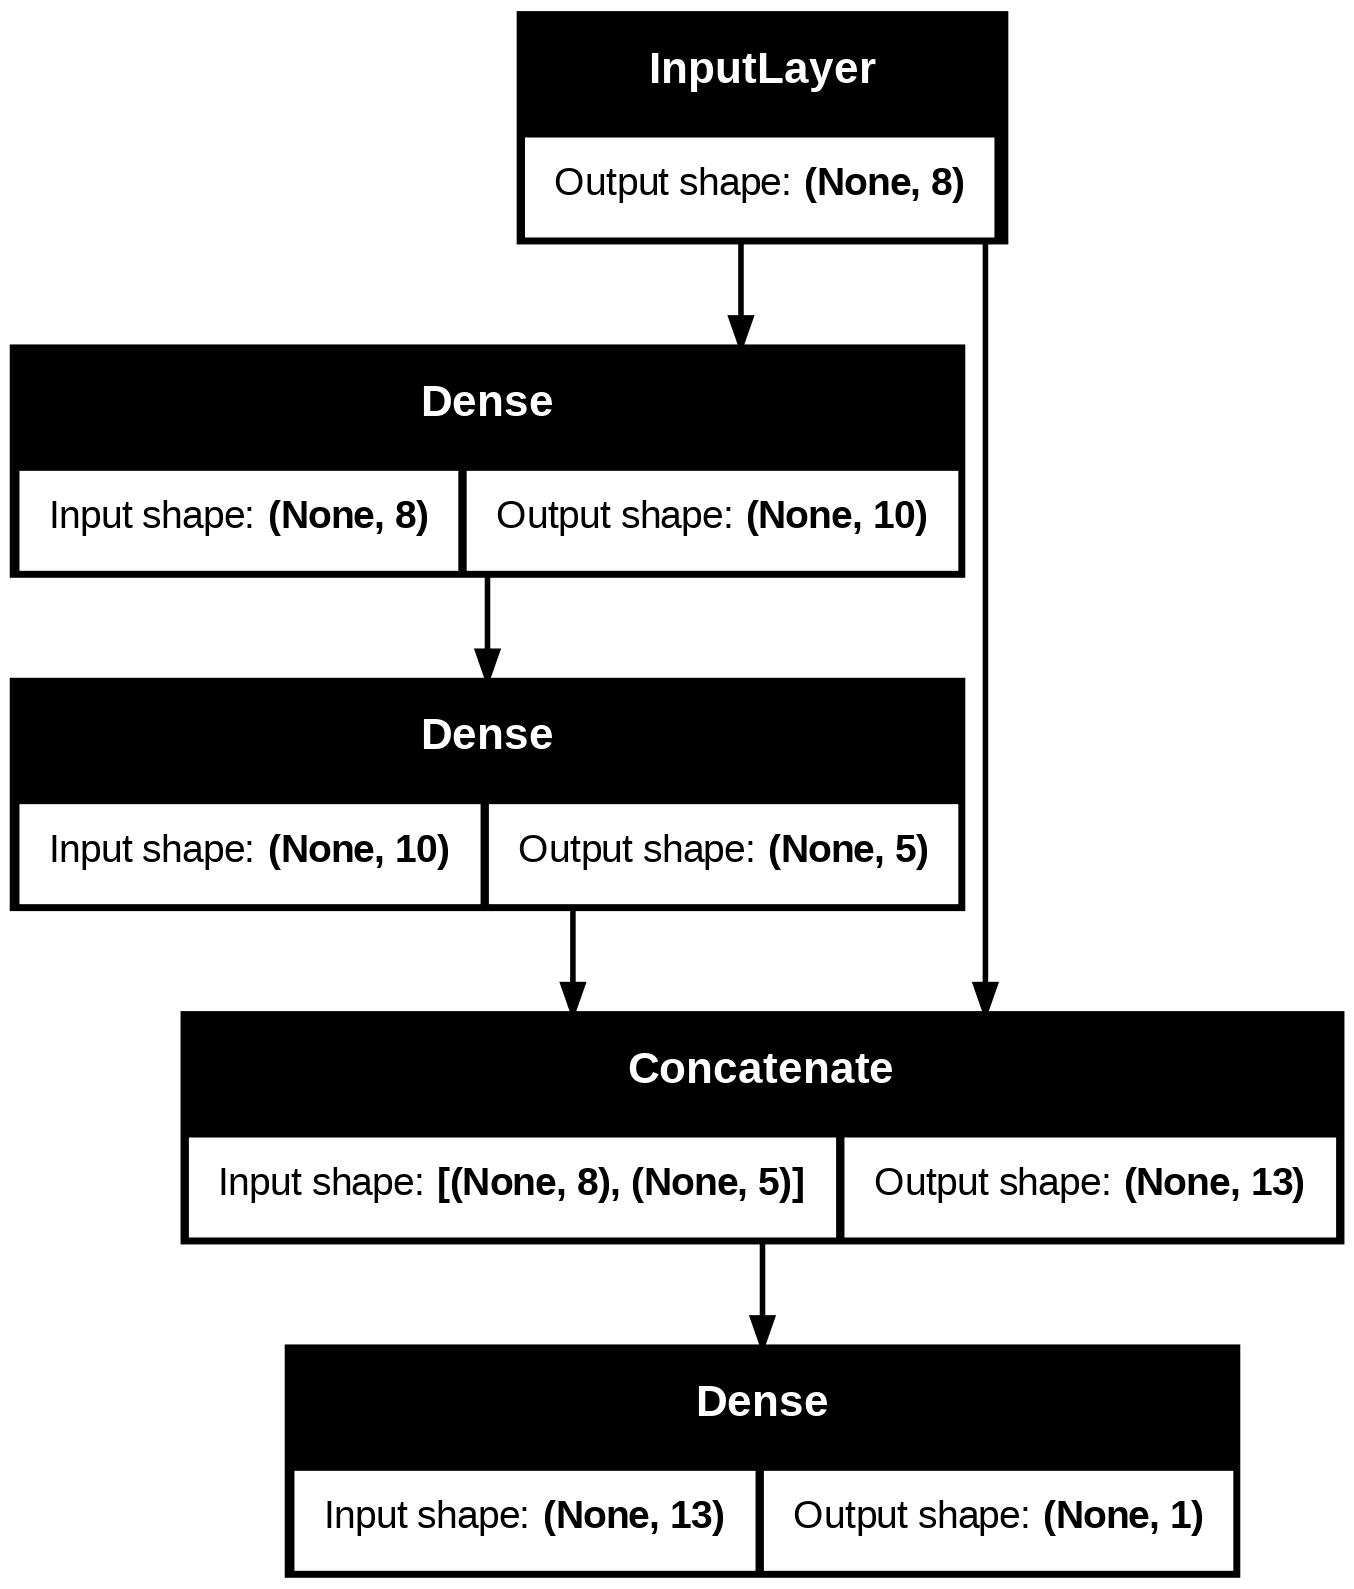

In [64]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [65]:
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 10)             │             90 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_22 (Dense)          │ (None, 5)              │             55 │ dense_21[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 13)             │              0 │ input_layer_6[0][0],   │
│                           │                        │                │ dense_22[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_23 (Dense)          │ (None, 1)              │             14 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=6,
                    validation_data=(X_valid, y_valid))


Epoch 1/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5.0348 - val_loss: 1.2871
Epoch 2/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9588 - val_loss: 0.7322
Epoch 3/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6820 - val_loss: 0.6470
Epoch 4/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.6289 - val_loss: 0.6287
Epoch 5/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5961 - val_loss: 0.5993
Epoch 6/6
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5736 - val_loss: 0.5778


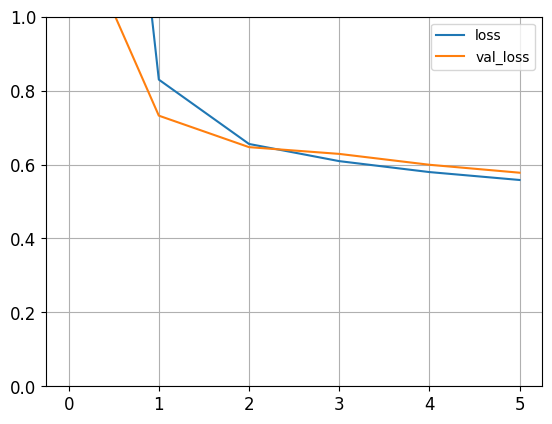

In [68]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
X_test

array([[-1.15780104, -0.28673138, -0.49550877, ...,  0.38899735,
         0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973, ..., -0.11818174,
        -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788, ..., -0.67694905,
         1.00890193, -1.4271529 ],
       ...,
       [-0.90351581,  0.66256679, -0.8562583 , ...,  0.68837768,
        -0.76194926,  0.66187253],
       [ 1.56873373, -1.78978682,  0.75535703, ..., -0.18226735,
         1.34152212, -0.73747465],
       [ 1.43527981,  0.58345861,  0.10928062, ..., -0.17819366,
        -0.82285155,  0.59190517]])

In [69]:
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4) through wide path, and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

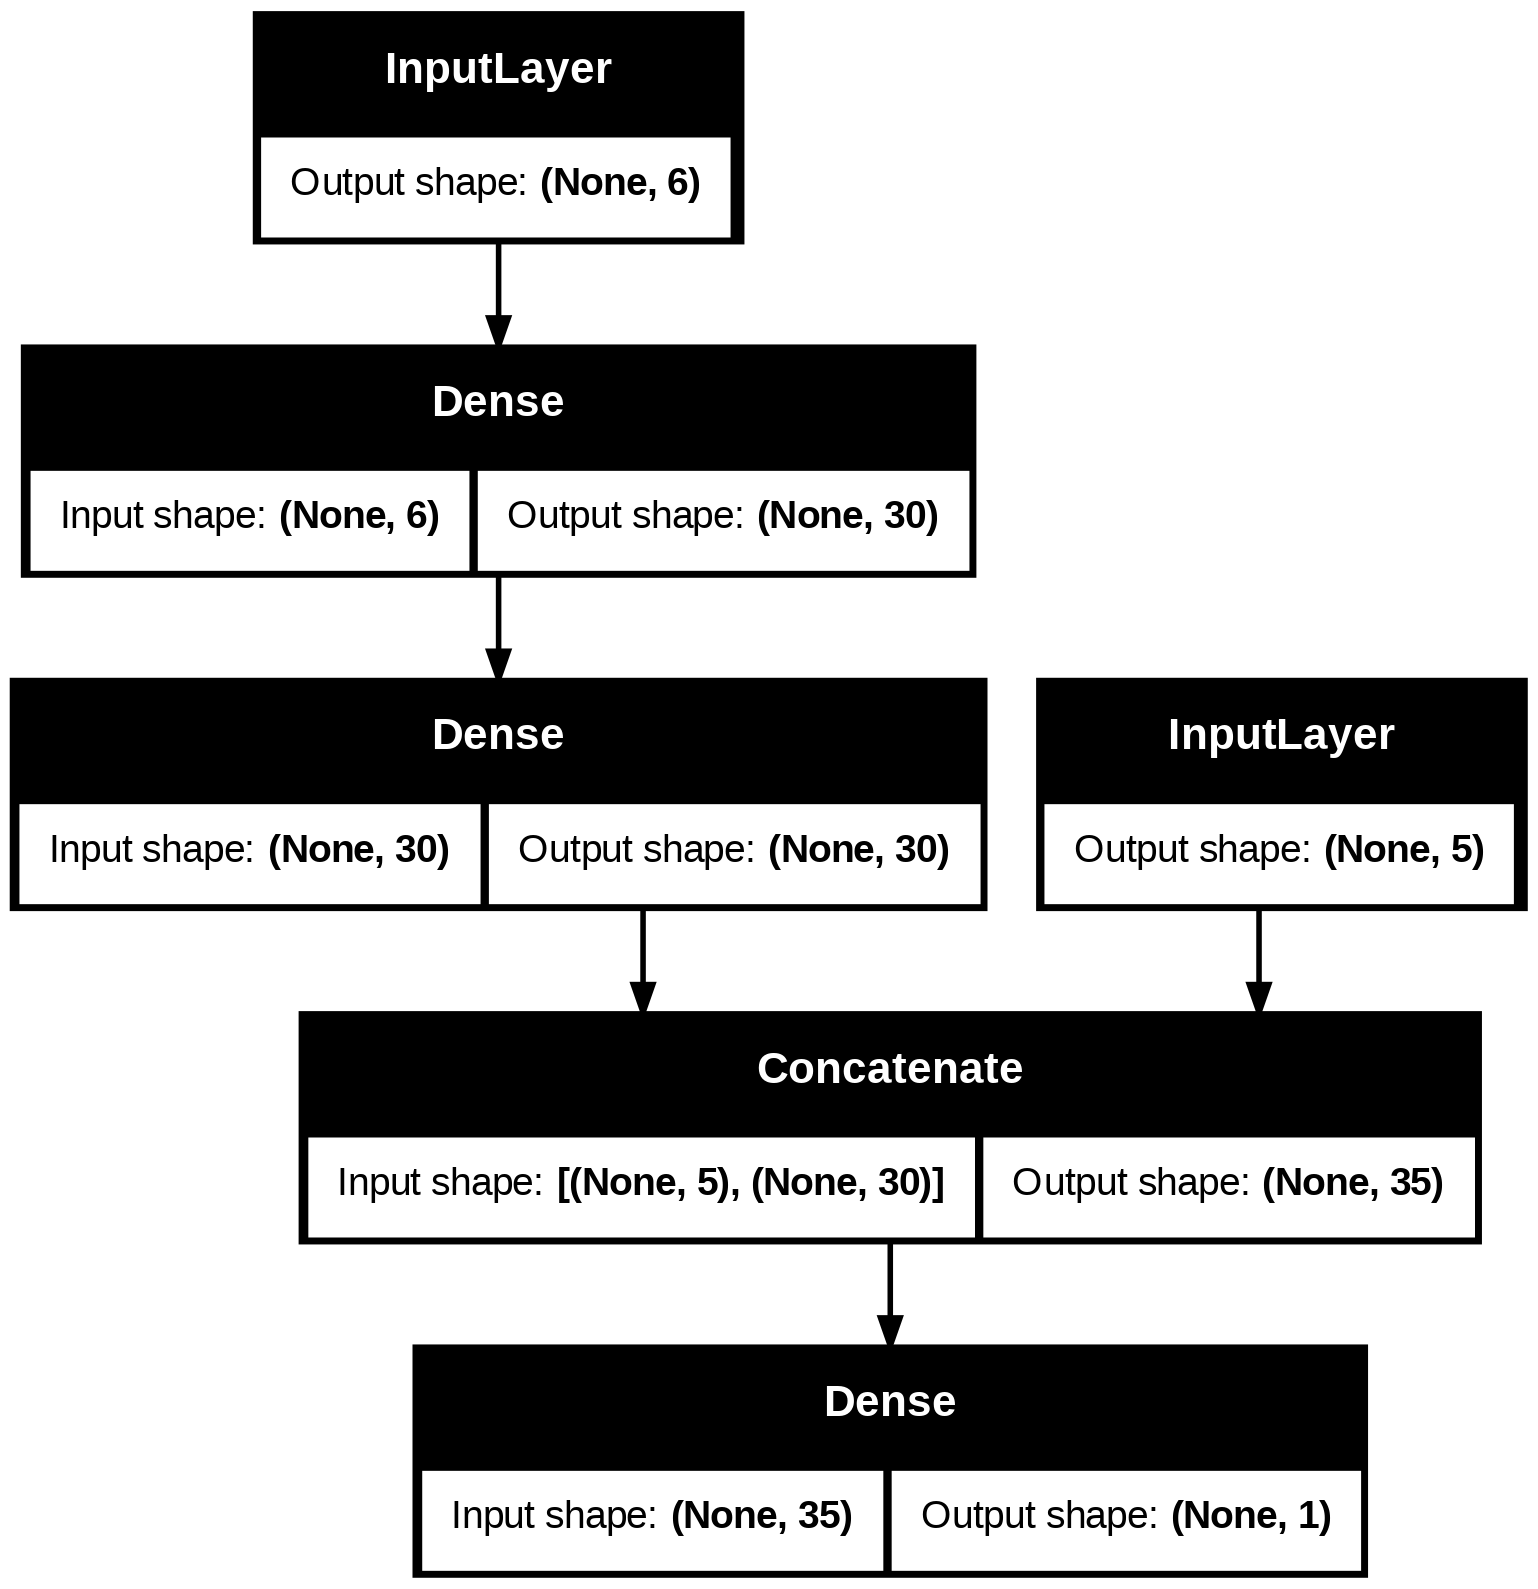

In [71]:
keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=5,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 3.7139 - val_loss: 1.1344
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8980 - val_loss: 0.7188
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7127 - val_loss: 0.6468
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6490 - val_loss: 0.6002
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6039 - val_loss: 0.5628
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


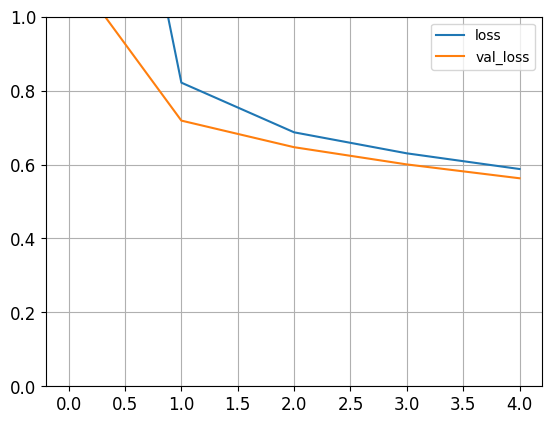

In [73]:
plt.plot(pd.DataFrame(history.history))
plt.legend(['loss', 'val_loss'])
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

We can use different regularization techniques in neural networks.


*   Dropout : The idea behind dropout is to randomly "drop out" (i.e., set to zero) a fraction of input units during training.During each training iteration, dropout randomly selects a subset of neurons to be "dropped out" with a specified probability.
*   $L_1,L_2$ regularization
*   Batch normalization : Batch Norm is just another network layer that gets inserted between a hidden layer and the next hidden layer. Its job is to take the outputs from the first hidden layer and normalize them before passing them on as the input of the next hidden layer.
*   Early stopping









### Saving and Restoring

In [74]:
np.random.seed(42)
tf.random.set_seed(42)

In [75]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [79]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.4578 - val_loss: 0.4477
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4469 - val_loss: 0.4422
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4378 - val_loss: 0.4383
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4301 - val_loss: 0.4354
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4235 - val_loss: 0.4328
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4177 - val_loss: 0.4309
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4127 - val_loss: 0.4301
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4082 - val_loss: 0.4300
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4040 - val_loss: 0.4299
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4003 - val_loss: 0.4297
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3953


In [80]:
model.save("my_keras_model.h5")

In [81]:
model = keras.models.load_model("my_keras_model.h5")

In [82]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


array([[1.7710997],
       [2.9898257],
       [1.4596794]], dtype=float32)

In [84]:
model.save_weights("my_keras_weights.weights.h5")

In [85]:
model.load_weights("my_keras_weights.weights.h5")

### Using Callbacks during Training

In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [92]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [94]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4557

363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4557 - val_loss: 0.4510
Epoch 2/10
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4449

363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.4447 - val_loss: 0.4439
Epoch 3/10
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4360

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4358 - val_loss: 0.4393
Epoch 4/10
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4287

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4286 - val_loss: 0.4363
Epoch 5/10
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4228

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4226 - val_loss: 0.4342
Epoch 6/10
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4175

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4174 - val_loss: 0.4330
Epoch 7/10
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4130

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4128 - val_loss: 0.4316
Epoch 8/10
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4090

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4089 - val_loss: 0.4301
Epoch 9/10
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4055

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4054 - val_loss: 0.4278
Epoch 10/10
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4024

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4022 - val_loss: 0.4257


162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3966


In [96]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3994

363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3994 - val_loss: 0.4237
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3967

363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3967 - val_loss: 0.4219
Epoch 3/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3943

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3942 - val_loss: 0.4202
Epoch 4/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3919

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3917 - val_loss: 0.4185
Epoch 5/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3896

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3895 - val_loss: 0.4168
Epoch 6/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3873

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3873 - val_loss: 0.4152
Epoch 7/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3853

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3851 - val_loss: 0.4135
Epoch 8/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3832

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3832 - val_loss: 0.4119
Epoch 9/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3814

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3812 - val_loss: 0.4101
Epoch 10/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3794

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3794 - val_loss: 0.4085
Epoch 11/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3778

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3777 - val_loss: 0.4070
Epoch 12/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3762

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3760 - val_loss: 0.4054
Epoch 13/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3745

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3745 - val_loss: 0.4039
Epoch 14/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3730

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3730 - val_loss: 0.4026
Epoch 15/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3716

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3715 - val_loss: 0.4012
Epoch 16/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3702

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3701 - val_loss: 0.4000
Epoch 17/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3688

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3688 - val_loss: 0.3987
Epoch 18/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3676

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3675 - val_loss: 0.3973
Epoch 19/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3664

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3663 - val_loss: 0.3961
Epoch 20/100
337/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3652

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3651 - val_loss: 0.3949
Epoch 21/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3640

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3639 - val_loss: 0.3936
Epoch 22/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3628

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3628 - val_loss: 0.3925
Epoch 23/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3617

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3617 - val_loss: 0.3915
Epoch 24/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3607

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3607 - val_loss: 0.3905
Epoch 25/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3597

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3597 - val_loss: 0.3896
Epoch 26/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3587

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3587 - val_loss: 0.3888
Epoch 27/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3577

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3577 - val_loss: 0.3879
Epoch 28/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3568

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3568 - val_loss: 0.3872
Epoch 29/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3559

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3559 - val_loss: 0.3863
Epoch 30/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3550

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3550 - val_loss: 0.3853
Epoch 31/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3541

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3541 - val_loss: 0.3844
Epoch 32/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3533

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3533 - val_loss: 0.3837
Epoch 33/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3525

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3524 - val_loss: 0.3828
Epoch 34/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3517

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3517 - val_loss: 0.3819
Epoch 35/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3509

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3509 - val_loss: 0.3811
Epoch 36/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3501

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3501 - val_loss: 0.3802
Epoch 37/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3494

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3494 - val_loss: 0.3794
Epoch 38/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3487

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3487 - val_loss: 0.3787
Epoch 39/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3480

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3480 - val_loss: 0.3780
Epoch 40/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3473

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3473 - val_loss: 0.3773
Epoch 41/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3466

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3466 - val_loss: 0.3767
Epoch 42/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3460

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3460 - val_loss: 0.3759
Epoch 43/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3453

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3453 - val_loss: 0.3753
Epoch 44/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3447

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3447 - val_loss: 0.3746
Epoch 45/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3441

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3441 - val_loss: 0.3740
Epoch 46/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3435

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3436 - val_loss: 0.3734
Epoch 47/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3430

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3430 - val_loss: 0.3728
Epoch 48/100
347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3424

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3424 - val_loss: 0.3722
Epoch 49/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3418

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3419 - val_loss: 0.3716
Epoch 50/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3413

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3413 - val_loss: 0.3710
Epoch 51/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3408

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3408 - val_loss: 0.3705
Epoch 52/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3403

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3403 - val_loss: 0.3700
Epoch 53/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3397

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3398 - val_loss: 0.3694
Epoch 54/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3392

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3392 - val_loss: 0.3688
Epoch 55/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3387

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3387 - val_loss: 0.3682
Epoch 56/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3382

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3382 - val_loss: 0.3676
Epoch 57/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3377

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3377 - val_loss: 0.3670
Epoch 58/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3372

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3372 - val_loss: 0.3665
Epoch 59/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3367

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3368 - val_loss: 0.3660
Epoch 60/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3363

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3363 - val_loss: 0.3654
Epoch 61/100
346/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3357

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3358 - val_loss: 0.3650
Epoch 62/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3353

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3353 - val_loss: 0.3646
Epoch 63/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3348

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3349 - val_loss: 0.3642
Epoch 64/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3344

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3344 - val_loss: 0.3638
Epoch 65/100
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3338

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3339 - val_loss: 0.3632
Epoch 66/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3334

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3334 - val_loss: 0.3628
Epoch 67/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3329

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3329 - val_loss: 0.3625
Epoch 68/100
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3324

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3325 - val_loss: 0.3621
Epoch 69/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3320

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3321 - val_loss: 0.3616
Epoch 70/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3315

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3316 - val_loss: 0.3611
Epoch 71/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3312

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3312 - val_loss: 0.3608
Epoch 72/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3307

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3307 - val_loss: 0.3604
Epoch 73/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3303

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3303 - val_loss: 0.3599
Epoch 74/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3298

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3299 - val_loss: 0.3595
Epoch 75/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3294

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3295 - val_loss: 0.3590
Epoch 76/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3290

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3290 - val_loss: 0.3585
Epoch 77/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3285

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3286 - val_loss: 0.3581
Epoch 78/100
345/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3282

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3283 - val_loss: 0.3577
Epoch 79/100
348/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3278

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3279 - val_loss: 0.3573
Epoch 80/100
344/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3274

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3275 - val_loss: 0.3569
Epoch 81/100
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3270

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3271 - val_loss: 0.3565
Epoch 82/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3267

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3267 - val_loss: 0.3561
Epoch 83/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3262

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3263 - val_loss: 0.3557
Epoch 84/100
343/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3258

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3259 - val_loss: 0.3553
Epoch 85/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3255

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3256 - val_loss: 0.3548
Epoch 86/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3252

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3252 - val_loss: 0.3544
Epoch 87/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3247

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3248 - val_loss: 0.3541
Epoch 88/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3244

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3244 - val_loss: 0.3537
Epoch 89/100
340/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3239

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3241 - val_loss: 0.3532
Epoch 90/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3236

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3237 - val_loss: 0.3528
Epoch 91/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3233

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3234 - val_loss: 0.3525
Epoch 92/100
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3230

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3230 - val_loss: 0.3520
Epoch 93/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3226

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3227 - val_loss: 0.3517
Epoch 94/100
338/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3222

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3224 - val_loss: 0.3513
Epoch 95/100
339/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3219

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3220 - val_loss: 0.3509
Epoch 96/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3217

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3217 - val_loss: 0.3505
Epoch 97/100
342/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3213

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3214 - val_loss: 0.3501
Epoch 98/100
341/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3209

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3211 - val_loss: 0.3497
Epoch 99/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3207

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3208 - val_loss: 0.3493
Epoch 100/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3204

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3204 - val_loss: 0.3489
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3332
